# Random Forest Regression (from scratch)
---------------------

# Import Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare Data

In [2]:
df = pd.read_csv('Boston-house-price-data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Empty Placeholder for Predictions

In [3]:
my_results = []
my_mse = []

## Split Data

In [4]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [5]:
X # everything except medv!

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


## Select 3 random columns from X (X_tmp)
We will call this `X_tmp`.

How to randomly select columns:
* https://datatofish.com/random-columns-pandas-dataframe/

In [6]:
X_tmp = X.sample(n=3,axis='columns')
X_tmp

,B,ZN,NOX
0,396.90,18.0,0.538
1,396.90,0.0,0.469
2,392.83,0.0,0.469
3,394.63,0.0,0.458
4,396.90,0.0,0.458
...,...,...,...
501,391.99,0.0,0.573
502,396.90,0.0,0.573
503,396.90,0.0,0.573
504,393.45,0.0,0.573


# Fit a DT Model
Remember, you have MANY hyperparameters here! If you don't put some brakes on the DT model it can very easily memorize the training data (low bias, but probably high variance).

In [7]:
# fit the model
clf = DecisionTreeRegressor(min_samples_leaf=10)
clf = clf.fit(X_tmp, y)

In [8]:
# predict the X data (X_tmp, not X)
preds = clf.predict(X_tmp) 
preds

array([31.40909091, 34.59      , 34.59      , 27.17142857, 27.17142857,
       27.17142857, 21.44444444, 21.44444444, 19.17777778, 19.17777778,
       19.17777778, 21.44444444, 19.17777778, 19.46428571, 19.17777778,
       19.9       , 19.17777778, 19.17777778, 14.54      , 19.17777778,
       27.28      , 19.17777778, 19.46428571, 19.9       , 19.9       ,
       15.79      , 27.28      , 15.79      , 19.17777778, 19.17777778,
       15.79      , 27.28      , 14.54      , 15.79      , 14.54      ,
       22.1       , 22.1       , 22.1       , 22.1       , 32.36      ,
       32.36      , 22.78      , 22.78      , 27.17142857, 22.78      ,
       27.17142857, 27.17142857, 22.78      , 27.17142857, 27.17142857,
       22.62      , 22.62      , 25.39166667, 25.39166667, 24.09166667,
       38.96      , 24.09166667, 38.96      , 21.70909091, 25.39166667,
       21.70909091, 21.70909091, 25.39166667, 25.39166667, 31.40909091,
       25.89285714, 25.89285714, 22.63      , 22.63      , 22.63

In [9]:
# calculate error metrics
errors = mean_squared_error(y, preds)
my_mse.append(errors)

Order will be preserved because we are not shuffling any data. Now we will put this in a for loop - at the very end, we will just take the average prediction for each observation across 100 trees! We should see the overall model error decrease as we go along.

# A Big For Loop
Here we go! All the same code, but now it's in a for loop. Note how we will use a random seed in sample so that 1) our results are different each iteration but 2) will be repeatable.

In [ ]:
my_results = []
my_mse = []

for a in range(1000):
  print(a)
  X_tmp = X.sample(n=3,axis='columns', random_state=a) # notice a here!
  # fit the model
  clf = DecisionTreeRegressor(min_samples_leaf=10)
  clf = clf.fit(X_tmp, y)
  # predict the X data (X_tmp, not X)
  preds = clf.predict(X_tmp) 
  # calculate error metrics
  errors = mean_squared_error(y, preds)
  # store the pred results
  my_results.append(preds)
  my_mse.append(errors)
print('All Done!')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# Evaluate the Results
Remember, a random forest is just the simple average of decision tree outputs. We have 1000 predictions per observation (n=506)... so let's take the average to get the final prediction.

In [ ]:
# for wrangling ease, convert it to a dataframe
my_results = pd.DataFrame(my_results)
my_results.shape # 102 rows and 506 columns

(1000, 506)

So this is OK! 1000 rows instead of 506... just take transpose and then let it rip!

In [ ]:
my_results = my_results.T
print(my_results.shape)
my_results

(506, 1000)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,21.214286,29.126087,21.626316,21.975000,21.518750,27.236842,32.140000,30.050000,26.888235,30.815789,27.940000,29.529412,25.668421,26.192857,25.669231,31.129412,35.322222,29.890909,28.762500,29.830000,31.250000,27.236842,31.075000,32.953846,31.005882,25.591667,22.700000,31.575000,31.129412,30.876471,29.158824,21.959375,29.55000,32.880000,28.800000,29.607692,23.207143,17.338462,24.741667,27.800000,...,26.888235,33.220000,26.923077,28.800000,31.437500,31.437500,20.168421,31.582353,21.959375,31.237500,25.390000,23.207143,25.862500,18.600000,25.114286,32.266667,27.410000,22.938462,30.576471,27.441176,20.488889,22.10000,21.506667,17.820000,18.473333,31.361538,23.207143,30.905882,32.180000,23.590909,32.880000,30.400000,31.005882,25.007143,28.926667,24.345455,26.923077,35.322222,26.128571,30.400000
1,20.720000,23.745455,27.878571,34.590000,20.720000,24.437500,19.700000,24.945455,31.378947,25.463636,23.450000,23.768750,25.700000,25.478571,22.025000,24.085714,23.780000,22.387500,21.760000,23.509091,23.261905,24.437500,22.387500,24.475000,26.850000,25.591667,27.071429,24.970000,24.085714,25.069231,27.878571,26.956522,24.82000,21.327273,21.327273,17.761538,28.972727,22.031250,30.200000,24.360000,...,31.378947,22.133333,24.820000,19.763636,20.327273,23.380000,25.712500,22.068421,26.956522,20.850000,21.260000,28.972727,17.554545,23.228571,25.230000,21.328571,25.690000,29.262500,21.654545,23.766667,22.031250,22.03125,28.470000,26.452632,20.720000,19.850000,28.972727,25.790000,21.030000,37.670000,21.327273,21.450000,26.850000,24.326316,21.242857,23.690000,23.690000,23.780000,21.927273,21.450000
2,27.233333,23.745455,27.878571,34.590000,26.761538,30.960000,25.050000,24.945455,31.378947,25.463636,33.260000,29.529412,35.120000,34.783333,34.146154,40.373333,23.780000,40.466667,40.746154,34.541176,23.261905,30.960000,40.800000,24.475000,41.590000,30.620000,27.071429,41.590000,40.373333,31.808333,27.878571,26.956522,24.82000,40.987500,37.750000,25.600000,28.972727,22.031250,30.200000,28.757143,...,31.378947,26.883333,24.820000,37.750000,32.061538,36.309091,25.712500,39.111111,26.956522,32.061538,23.020000,28.972727,34.833333,32.725000,34.146154,40.466667,25.690000,27.007143,36.688889,34.100000,22.031250,22.03125,32.506250,26.452632,26.761538,25.050000,28.972727,25.790000,43.040000,37.670000,41.590000,25.360000,41.590000,35.121429,41.590000,23.690000,23.690000,23.780000,29.830000,25.360000
3,27.233333,32.218182,29.290000,26.392308,26.761538,30.960000,31.813333,30.050000,28.466667,32.875000,29.140000,24.166667,28.036364,34.783333,36.680000,35.550000,35.322222,43.988889,45.306250,34.541176,23.261905,30.960000,45.846154,32.953846,38.889474,31.561538,35.531579,38.889474,35.550000,35.918182,28.390909,23.975000,32.87500,40.987500,41.509091,32.733333,30.700000,28.940000,29.494118,32.243750,...,28.466667,24.570000,37.080000,41.509091,41.525000,41.900000,25.712500,43.988889,23.975000,42.792308,26.200000,30.700000,33.300000,26.740000,36.680000,43.988889,37.413333,28.214286,36.688889,28.036364,32.030000,34.76000,25.170000,26.452632,26.761538,33.723529,30.700000,25.790000,45.306250,25.887500,38.889474,30.400000,38.889474,35.121429,38.889474,35.263636,27.955556,35.322222,30.130000,30.400000
4,27.233333,32.218182,29.290000,26.392308,26.761538,30.960000,31.813333,30.050000,28.466667,32.875000,29.140000,29.529412,28.036364,34.783333,34.146154,31.129412,35.322222,29.890909,34.053846,34.053846,23.261905,30.960000,31.075000,32.953846,31.005882,26.200000,35.531579,31.575000,31.129412,30.876471,28.390909,23.975000,32.87500,32.880000,31.245455,32.733333,30.700000,28.940000,29.494118,34.918750,...,28.466667,31.250000,34.326667,31.245455,31.437500,31.437500,25.712500,28.754545,23.975000,31.237500,26.2

Now, take the average per row! Then calculate the mean squared error and see how you did.

In [ ]:
AVG = my_results.mean(axis=1)
AVG # here are the raw results (put into a dataframe if you want)

0      27.212090
1      23.872175
2      30.201237
3      32.417635
4      30.621563
         ...    
501    22.513851
502    20.846601
503    23.954738
504    22.837256
505    20.228320
Length: 506, dtype: float64

Now, the error metrics and a nice scatterplot.

In [ ]:
mean_squared_error(y, AVG)

16.658495736617244

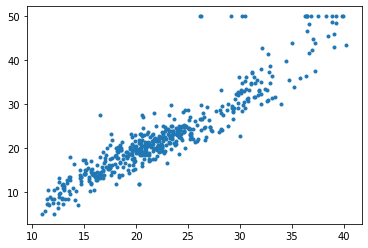

In [ ]:
from pylab import *
plot(AVG, y, '.')
plt.show()

BAM!!!! It looks AWESOME!!!

# Trending the predictions
To show the power of each tree, calculate the row-wise average and store it as you go along.

In [ ]:
my_results.shape

(506, 1000)

In [ ]:
tmp_results = [] # store the intermediate results
tmp_mse = []
for a in range(my_results.shape[1]): # so we don't include the average column!
  tmp = my_results.iloc[:, np.arange(a+1)]
  tmp_preds = tmp.mean(axis=1)
  tmp_results.append(tmp_preds)
  # error metrics
  tmp_err = mean_squared_error(y, tmp_preds.T)
  tmp_mse.append(tmp_err)

See what you did!

In [ ]:
# these are the intermediate preds
tmp_results = pd.DataFrame(tmp_results)
print(tmp_results.shape)
tmp_results = tmp_results.T # we're gonna take the transpose 
tmp_results # show it!

(1000, 506)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,21.214286,25.170186,23.988896,23.485422,23.092088,23.782880,24.976754,25.610910,25.752835,26.259131,26.411937,26.671726,26.594549,26.565857,26.506082,26.795040,27.296639,27.440765,27.510330,27.626313,27.798870,27.773323,27.916874,28.126748,28.241914,28.139981,27.938500,28.068375,28.173928,28.264013,28.292878,28.094956,28.139048,28.278488,28.293388,28.329897,28.191444,27.905839,27.824706,27.824089,...,27.225332,27.231563,27.231243,27.232870,27.237227,27.241576,27.234261,27.238753,27.233305,27.237433,27.235530,27.231386,27.229979,27.221118,27.218957,27.224129,27.224320,27.219937,27.223366,27.223588,27.216723,27.211512,27.205709,27.196171,27.187315,27.191548,27.187512,27.191275,27.196319,27.192677,27.198416,27.201644,27.205475,27.203263,27.204995,27.202124,27.201844,27.209981,27.208899,27.212090
1,20.720000,22.232727,24.114675,26.733506,25.530805,25.348588,24.541647,24.592123,25.346214,25.357956,25.184506,25.066526,25.115255,25.141206,24.933459,24.880475,24.815741,24.680839,24.527111,24.476210,24.418386,24.419254,24.330917,24.336921,24.437444,24.481837,24.577748,24.591757,24.574307,24.590805,24.696862,24.767476,24.769068,24.667838,24.572394,24.383203,24.507244,24.442087,24.589725,24.583982,...,23.876653,23.874841,23.875823,23.871557,23.867884,23.867379,23.869287,23.867427,23.870615,23.867501,23.864815,23.870070,23.863579,23.862928,23.864330,23.861732,23.863603,23.869123,23.866861,23.866759,23.864888,23.863021,23.867707,23.870334,23.867136,23.863062,23.868239,23.870184,23.867312,23.881254,23.878677,23.876229,23.879223,23.879673,23.877023,23.876835,23.876648,23.876551,23.874600,23.872175
2,27.233333,25.489394,26.285786,28.361840,28.041780,28.528150,28.031271,27.645544,28.060367,27.800694,28.296994,28.399696,28.916642,29.335692,29.656389,30.326198,29.941128,30.525880,31.063789,31.237658,30.857860,30.862503,31.294568,31.010420,31.433603,31.402310,31.241907,31.611482,31.913615,31.910106,31.780056,31.629321,31.422978,31.704287,31.877022,31.702660,31.628878,31.376309,31.346147,31.281422,...,30.176914,30.173491,30.167931,30.175797,30.177751,30.184098,30.179474,30.188701,30.185365,30.187299,30.179918,30.178676,30.183460,30.186069,30.190131,30.200660,30.196043,30.192783,30.199418,30.203398,30.195068,30.186754,30.189114,30.185317,30.181841,30.176636,30.175416,30.170978,30.183990,30.191551,30.203053,30.198171,30.209643,30.214585,30.226017,30.219455,30.212906,30.206460,30.206083,30.201237
3,27.233333,29.725758,29.580505,28.783456,28.379072,28.809227,29.238385,29.339837,29.242818,29.606036,29.563669,29.113919,29.031030,29.441909,29.924448,30.276045,30.572879,31.318213,32.054426,32.178763,31.754151,31.718053,32.332318,32.358215,32.619466,32.578776,32.688139,32.909615,33.000663,33.097914,32.946075,32.665729,32.672070,32.916642,33.162140,33.150229,33.084007,32.974954,32.885702,32.869653,...,32.381663,32.373542,32.378430,32.387901,32.397370,32.407207,32.400284,32.412255,32.403548,32.414258,32.407858,32.406101,32.407020,32.401202,32.405590,32.417458,32.422572,32.418269,32.422631,32.418155,32.417760,32.420145,32.412769,32.406712,32.400981,32.402323,32.400598,32.393907,32.406963,32.400378,32.406926,32.404902,32.411433,32.414159,32.420667,32.423521,32.419040,32.421949,32.419655,32.417635
4,27.233333,29.725758,29.580505,28.783456,28.379072,28.809227,29.238385,29.339837,29.242818,29.606036,29.563669,29.560814,29.443549,29.824962,30.113042,30.176565,30.479250,30.446565,30.636422,30.807293,30.447989,30.471262,30.497511,30.599859,30.616100,30.446250,30.634595,30.668181,30.684086,30.690498,30.616318,30.408777,30.483511,30.553996,30.573752,30.633740,30.635531,30.590912,30.562789,30.671688,...,30.630656,30.631300,30.635137,30.635770,30.636601,30.637430,30.632337,30.630397,30.623529,30.62

In [ ]:
# and here is the error!
tmp_mse[0:15] # mse from the first 15 trees...

[33.749995471627436,
 28.389554224138887,
 26.421701232609326,
 26.15070870013648,
 26.799187553449187,
 21.887134309638206,
 21.90771384537026,
 23.20093391201195,
 22.793198793615836,
 22.73818066961772,
 23.24522431894006,
 24.23496360113271,
 22.65380349882952,
 21.39231100157082,
 19.75693907424031]

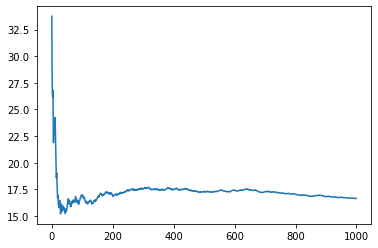

In [ ]:
# let's plot it!
plot(tmp_mse) # so it looks like we may have only needed ~25 trees
plt.show()

# RFR Hyperparameters (for grid search)
***Background: here is a list of the hyperparameters in sklearn for the `DecisionTreeRegressor()`:***

**n_estimators:** `int, default=100`

The number of trees in the forest.

**criterion:** `{“mse”, “mae”}, default=”mse”`

The function to measure the quality of a split. 

**max_depth:** `int, default=None`

The maximum depth of the tree. 

**min_samples_split:** `int or float, default=2`

The minimum number of samples required to split an internal node.

**min_samples_leaf:** `int or float, default=1`

The minimum number of samples required to be at a leaf node.

**max_features:** `{“auto”, “sqrt”, “log2”}, int or float, default=”auto”`

The number of features to consider when looking for the best split:

**max_leaf_nodes:** `int, default=None`

Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

# On Your Own Exercises
* Try fitting 200, 500 and 1000 trees and compare the results.
* Repeat the same as above, but try using 5 variables or 8 instead of 3 variables and see how this affects your prediction.
* Same as above, but try splitting your data into train and test - build the model on the train, evaluate on the test, and identify how many trees you should use by doing a visual inspection.

When doing the above by hand (optional), try to use intelligent/efficient labeling so that you don't have tons of random dataframes floating around. Store the trees and variable counts as columns in the dataframe.


## 1) Comparing Different Numbers of Trees
Try fitting 200, 500 and 1000 trees and compare the results.

### By Hand (optional)

### With Code
* Notice how this is just a hyperparameter that can be tweaked in order to get a better fit.
* Also appreciate how LONG it takes to fit these models once you start to mess around with the number of trees (estimators) - there is a difference between fitting 100 and 10000 trees! Try it...

In [ ]:
model = RandomForestRegressor(n_estimators=200)
model.fit(X,y)
preds = model.predict(X)
print(mean_squared_error(y, preds))

1.4320849841897236


In [ ]:
model = RandomForestRegressor(n_estimators=500)
model.fit(X,y)
preds = model.predict(X)
print(mean_squared_error(y, preds))

1.4291427396047374


In [ ]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X,y)
preds = model.predict(X)
print(mean_squared_error(y, preds))

1.4090808602766667


### With Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

RFR = RandomForestRegressor()

param_grid = {"n_estimators":  [200, 500,1000]}

## Comment in order to publish in kaggle.

grid_cv_RFR = GridSearchCV(RFR, param_grid, cv=5)

grid_cv_RFR.fit(X,y)

print("R-Squared::{}".format(grid_cv_RFR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_RFR.best_params_))

R-Squared::0.6264612109319172
Best Hyperparameters::
{'n_estimators': 500}


## 2) Comparing Different Numbers of Variables
**max_features:** {“auto”, “sqrt”, “log2”}, int or float, default=”auto”

The number of features to consider when looking for the best split:

* If int, then consider max_features features at each split.

* If float, then max_features is a fraction and round(max_features * n_features) features are considered at each split.

* If “auto”, then max_features=n_features.

* If “sqrt”, then max_features=sqrt(n_features).

* If “log2”, then max_features=log2(n_features).

* If None, then max_features=n_features.


You can mess around and try to tweak this!

### By Hand (optional)

### With Code
I started you off with some examples - go ahead and try some others! Clearly there will be some special combination of hyperparameters that result in a better fitting model.

In [ ]:
model = RandomForestRegressor(n_estimators=200, max_features=3)
model.fit(X,y)
preds = model.predict(X)
print(mean_squared_error(y, preds))

1.3335119160079074


In [ ]:
model = RandomForestRegressor(n_estimators=200, max_features=5)
model.fit(X,y)
preds = model.predict(X)
print(mean_squared_error(y, preds))

1.3198443171936778


In [ ]:
model = RandomForestRegressor(n_estimators=200, max_features=8)
model.fit(X,y)
preds = model.predict(X)
print(mean_squared_error(y, preds))

1.357157624011858


### With Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

RFR = RandomForestRegressor()

param_grid = {"n_estimators": [200],
              "max_features": [3,5,8]}

## Comment in order to publish in kaggle.

grid_cv_RFR = GridSearchCV(RFR, param_grid, cv=5)

grid_cv_RFR.fit(X,y)

print("R-Squared::{}".format(grid_cv_RFR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_RFR.best_params_))

R-Squared::0.6617247073375946
Best Hyperparameters::
{'max_features': 8, 'n_estimators': 200}


## 3) Train and Test Partitions with Hyperparamter
This is what data scientists do - they fit models with the defaults (to get some basic notion of how the fit is happening) - and then they tweak knobs until the model fits just right. It is part art, part science - and frankly - something that a computer can probably do better than a human (we will address this in the emerging AutoML lecture.) But for now, you need to understand what the AutoML is going to do for you later on.

### By Hand (optional)

### With Code

In [ ]:
from sklearn.model_selection import train_test_split
# split the data in ONE LINE OF CODE
# be careful of capital vs. lowercase X and Y, you might get an error...
# notice the 80/20 split we perform
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

# check your shape 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [ ]:
# don't forget to import your modules/functions to help you splitting your data
# train on X_train
# test on X_test

# fit the best parameters
model = RandomForestRegressor(n_estimators=200, max_features=8,min_samples_split=20,max_depth=50)
model.fit(X_train,y_train)

# store the predictions
train_preds_RFR = model.predict(X_train) 
test_preds_RFR = model.predict(X_test) 

In [ ]:
# Evalution
# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 1) R2 value - for Random Forest Regression
print("This is train R2 (RFR):", r2_score(y_train, train_preds_RFR)) # train
print("This is test R2 (RFR):", r2_score(y_test, test_preds_RFR)) # test

# 2) mae - for RF Regression
print('-')
trainMAE_RFR = mean_absolute_error(y_train, train_preds_RFR)
print("This is trainMAE (RFR):", trainMAE_RFR) # train
testMAE_RFR = mean_absolute_error(y_test, test_preds_RFR)
print("This is testMAE (RFR):", testMAE_RFR) # test

# 3) mse
print('-')
trainMSE_RFR = mean_squared_error(y_train, train_preds_RFR)
print("This is trainMSE (RFR):", trainMSE_RFR)
testMSE_RFR = mean_squared_error(y_test, test_preds_RFR)
print("This is testMSE (RFR):", testMSE_RFR)

This is train R2 (RFR): 0.9274353738612244
This is test R2 (RFR): 0.8651589639461157
-
This is trainMAE (RFR): 1.7478313690074943
This is testMAE (RFR): 2.108395326327184
-
This is trainMSE (RFR): 6.303936070541434
This is testMSE (RFR): 9.888403299088838


### With Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

RFR = RandomForestRegressor()

param_grid = {"n_estimators":  [200, 500],
              "max_features": [3,5,8],
              "max_depth":[10,50,100],
              "min_samples_split":[20,40,60]}

## Comment in order to publish in kaggle.

grid_cv_RFR = GridSearchCV(RFR, param_grid, cv=5)

grid_cv_RFR.fit(X_train,y_train)

print("R-Squared::{}".format(grid_cv_RFR.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_RFR.best_params_))

R-Squared::0.8215194095456209
Best Hyperparameters::
{'max_depth': 50, 'max_features': 8, 'min_samples_split': 20, 'n_estimators': 500}
